# 4. Soluções de Equações com Uma Variável

Neste capítulo são abordados diferentes métodos numéricos utilizados para obter soluções aproximadas de equações com uma variável, quando a solução exata não pode ser obtida por métodos algébricos. Desta forma, os métodos numéricos que serão discutidos, permitem trabalhar um dos problemas que aparecem mais frequentemente nas aproximações numéricas, o problema de se encontrar as raízes de uma equação.  

## 4.1 O Método da Bissecção 

O processo de calcular a raiz o solução de uma equação da forma $f(x) = 0$ para uma dada função $f$, é também conecido como cálculo dos zeros da função $f$. A primeira técnica que é abordada neste capítulo se baseia no __Teorema do Valor Intermediário__, apresentado no [Capítulo 1](http://localhost:8888/doc/tree/An%C3%A1lise_Num%C3%A9rica/01-Revis%C3%A3o%20de%20C%C3%A1lculo.ipynb). Este método é conhecido como __método da Bissecção__ ou de __Pesquisa Binária__. Para derivar o memso suponho que $f$ seja uma função contínua definida no intervalo $[a, b]$, com $f(a)$ e $f(b)$ de sinais opostos. Pelo Teorema do Valor Intermediário existe um número $p$ no intervalo $(a, b)$ tal que $f(p) = 0$. Embrora o procedimento funcione também quando há mais de uma raiz no intervalo $(a,b)$, se assume, por simplicidade, qua a raiz nesse intervalo é única. O método envolve um diminuição contínua do intervalo de busca, deividindo em duas partes iguais e identificando em qual delas se encontra o ponto $p$. 

Inicialmente considera-se $a_1 = a$ e $b_1 = b$, e estima-se o valor de $p_1$ como sendo o meio do intervalo; isto ,

$$p_1 = a_1 + \frac{b_1 - a_1}{2} = \frac{a + b}{2} .$$

Se $f(p_1) = 0$, então $p = p1$, e teremos encontrado a solução. Se $f(p_1) \neq 0$, então $f(p_1)$ tem o mesmo sinal de $f(a_1)$ ou de $f(b_1)$. Quando $f(p_1)$ e $f(a_1)$ têm o mesmo sinal, $p \in (p_1, b_1)$ e fazemos $a_2 = p_1$ e $b_2 = b_1$. Quando $f(p_1$ e $f(a_1)$ têm o sinais opestos, $p \in (a_1, p_1)$ e fazemos $a_2 = a_1$ e $b_2 = p_1$. O processo pode ser replicado para o intervalo $[a_2, b_2]$. Vaja a implementação deste algorítmo a seguir.


In [1]:
'''
    Implementação do algorítmo da Bissecção de acordo com o algorítmo 2.1 proposto no Burden
    OBJETIVO: Encontrar uma solução para f(x) = 0 dada a função f contínua no intervalo [a, b], 
    onde f(a) e f(b) têm sinais opostos
    ENTRADA: função f; pontos extremos a, b; tolerância TOL; número máximo de iterações N.
    SAÌDA: Solução aproximada p, quantidade de iterações e tamanho do último intervalo de busca.
'''
def bisection(f, a, b, TOL = 1e-6, N = 100):
    it = 1               # Passo 1: Inicialização
    FA = f(a)
    while( it < N):      # Passo 2: Verificando o limite de iterações 
        h = (b - a)*0.5  
        p = a + h        # Passo 3: determinando o meio do intervalo 
        FP = f(p)
        if((FP == 0) or (h < TOL)): # Passo 4: Avaliando os criterios de parada 
            return (p, it, h)       # SAÍDA se satisfeito o criterio de parada
        it += 1          # Passo 5: Incrementando o cntador de iterações  
        if(FA*FP > 0):   # Passo 6: Determinando o novo intervalo 
            a = p
            FA = FP
        else:
            b = p
    return (p, it, h)    # Passo 7: SAÍDA após exceder o limite de iterações 

Outros métodos o criterios de parada podem ser utilizados no algoritmo no passo 4 do algoritmo que foi implementada na função anterior, ou em qualquer uma das técnicas que serão discutidas neste capítulo. Pode ser selecionada, por exemplo, uma tolerâmcioa $\epsilon > 0$ e gerar uma sequencia de estimativas $p_1, \dots, p_N$ até que uma das seguintes condições seja alcançada:

$$ |p_N - p_{N-1}| < \epsilon$$

$$\frac{|p_N - p_{N-1}|}{|p_N|} < \epsilon, \ \ \ p_N \neq 0, \ \text{ (*) ou}$$

$$ |f(p_N)| < \epsilon$$

Infelizmente, podem surgir dificuldades na utilização de qualquer um desses critérios de parada. Por exemplo, existem sequências ${p_n}_{n = 0}^{\infty}$ que possuem a propriedade de que as diferenças $p_n - p_{n − 1}$ convergem para zero enquanto a própria sequência diverge. Também é possível que $f(p_n)$ seja próximo de zero, enquanto $p_n$ difere significativamente de $p$. Sem conhecimento adicional sobre $f$ ou $p$, a desigualdade (*) é o melhor critério de parada a ser aplicado porque se aproxima bastante de testar o erro relativo.

Ao usar um computador para gerar aproximações, é uma boa prática definir um limite superior para o número de iterações. Desta forma se elimina a possibilidade de entrar em um loop infinito, situação que pode surgir quando a sequência diverge (e também quando o programa está incorretamente codificado). Isso foi feito no Passo 2, onde o limite $N$ foi definido e o procedimento encerrado se $it> N$.

Observe que para iniciar o Algoritmo de Bissecção, um intervalo $[a, b]$ deve ser encontrado com $f(a) \cdot f(b) <0$. Em cada etapa, o comprimento do intervalo conhecido por conter um zero de $f$ é reduzido pela metade; portanto, é vantajoso escolher o intervalo inicial $[a, b]$ o menor possível. Por exemplo, se $f(x) = 2x^3 - x^2 + x - 1$, temo que tanto o intervalo $[-4, 4]$ quanto $[0, 1]$ cumprem a condição 

$$ f(-4) \cdot f(4) < 0 \ \ e \ \ f(0) \cdot f(1) < 0 $$

de modeo que o Algoritmo de Bissecção pode ser usado com ambos itervalos. Entretanto iniciar com o intervalo $[0, 1]$ reduz em três iterações o total necessário para alcansar uma determinada precisão. 

No seguinte exemplo se ilustra o uso do Algoritmo de Bissecção utilizando diferentes criterios de parada, com a mesma tolerancia de $0.0001$.

In [2]:
import sequvar as seq
import numpy as np
from fuliticas import f_exem4_1 as fx

a = 1
b = 2
TOL = 0.0001
N = 100
print(" Mostrando as iterações")
p, it, h = seq.bisection(fx, a, b, TOL, N, 0)
print("Criterio: ")
print("Tamnho do intervalo")
p, it, h = seq.bisection(fx, a, b, TOL, N, 1)
print("{:d} \t {:.9f} \t {:.9f} \t {:.9f}".format(it, p, fx(p), h))
print("Erro Absoluto")
p, it, h = seq.bisection(fx, a, b, TOL, N, 2)
print("{:d} \t {:.9f} \t {:.9f} \t {:.9f}".format(it, p, fx(p), h))
print("Erro Relativo")
p, it, h = seq.bisection(fx, a, b, TOL, N, 3)
print("{:d} \t {:.9f} \t {:.9f} \t {:.9f}".format(it, p, fx(p), h))
print("Valor da função em p")
p, it, h = seq.bisection(fx, a, b, TOL, N, 4)
print("{:d} \t {:.9f} \t {:.9f} \t {:.9f}".format(it, p, fx(p), h))

 Mostrando as iterações
n 	 a_n 		 b_n 		 P_n 		 f(p_n)
1 	 1.000000000 	 2.000000000 	 1.500000000 	 2.375000000
2 	 1.000000000 	 1.500000000 	 1.250000000 	 -1.796875000
3 	 1.250000000 	 1.500000000 	 1.375000000 	 0.162109375
4 	 1.250000000 	 1.375000000 	 1.312500000 	 -0.848388672
5 	 1.312500000 	 1.375000000 	 1.343750000 	 -0.350982666
6 	 1.343750000 	 1.375000000 	 1.359375000 	 -0.096408844
7 	 1.359375000 	 1.375000000 	 1.367187500 	 0.032355785
8 	 1.359375000 	 1.367187500 	 1.363281250 	 -0.032149971
9 	 1.363281250 	 1.367187500 	 1.365234375 	 0.000072025
10 	 1.363281250 	 1.365234375 	 1.364257812 	 -0.016046691
11 	 1.364257812 	 1.365234375 	 1.364746094 	 -0.007989263
12 	 1.364746094 	 1.365234375 	 1.364990234 	 -0.003959102
13 	 1.364990234 	 1.365234375 	 1.365112305 	 -0.001943659
14 	 1.365112305 	 1.365234375 	 1.365173340 	 -0.000935847
Criterio: 
Tamnho do intervalo
14 	 1.365173340 	 -0.000935847 	 0.000061035
Erro Absoluto
14 	 1.365173340 	 -0.0009

O método da bissecção, embora conceitualmente claro, tem desvantagens significativas. É relativamente lento para convergir, ou seja, $N$ pode se tornar muito grande antes de $|p - p_N|$ ser suficientemente pequeno, e uma boa aproximação intermediária pode ser inadvertidamente descartada. No entanto, o método tem a propriedade importante de sempre convergir para uma solução e, por esse motivo, é freqüentemente usado como ponto de partida para os métodos mais eficientes que veremos mais adiante neste capítulo.

__Teoream 4.1__ Suponha que $f \in C[a, b]$ e $f(a) \cdot f(b) < 0$. O método da Bissecção gera uma sequencia ${p_n}_{n=1}^{\infty}$ que se aproxima do valor $p$ correspondente ao zero de $f$, com

$$ | p_n - p | \leq \frac{b - a}{2^n}, \ \ \ \text{quando } n \geq 1.$$

__Demonstração__: Para cada $n \geq 1$, temos que

$$ b_n - a_n = \frac{1}{2^{n-1}}(b - a) \ \ \ \text{ e } \ \ \  p \in (a_n, b_n).$$

Como $ p_n = \frac{1}{2}(a_n + b_n)$ para todo $n \geq 1$, segue-se que 

$$ |p_n - p| \leq \frac{1}{2} (b_n - a_n) = \frac{b - a}{2^n}$$

Como

$$ |p_n - p| \leq (b - a) \frac{1}{2^n}$$

a sequencia ${p_n}_{n = 1}^\infty$ converge para $p$ com uma razão de convergência de $O(\frac{1}{2^n})$; isto é


$$ p_n = p + O(\frac{1}{2^n})$$

É importante perceber que o __Teorema 4.1__ fornece apenas um limite para o erro de aproximação e que esse limite pode ser bastante conservador. Por exemplo, este limite aplicado ao problema no exemplo anterior garante apenas que

$$ | p - p_9| \leq \frac{2-1}{2^9} \approx 2 \times 10^{-3} $$

mas o erro verdadeiro é muito menor, da ordem de $10^{-6}$.

A seguinte função permite determinar o número máximo de iterações necessárias para, utilizando o método de Bassecção, conseguir uma precisão específica. A implementação se baseia nos cálculos utilizados no Exemplo 2 do Burden


In [3]:
def qStepsBesection(a, b, prec):
    return (-1*np.log10(prec) / np.log10(2*(b - a)))
            
N = qStepsBesection(1, 2, 0.001)
print("Para a = 1, b = 2 e precisão de 10**-3 teremos N > {:.9f}".format(N))

Para a = 1, b = 2 e precisão de 10**-3 teremos N > 9.965784285


Na determinação do limite para o número de iterações pelo método da Bissecção assume-se que os cálculos são realizados usando aritmética com número de dígitos infinitos. Ao implementar o método em um computador, precisamos considerar os efeitos do erro de arredondamento. Desta forma o cálculo do ponto médio do intervalo $[a, b]$ deve ser feita a partir da equação 

$$ p_n = a_n + \frac{b_n - a_n}{2} $$

em vez da equacão algebrica equivalente 

$$ p_n = \frac{a_n + b_n}{2} $$

A primeira equação adiciona uma pequena correção, $(b_n — a_n)/2$, ao valor conhecido $a_n$. Quando $b_n - a_n$ está próximo da precisão máxima da máquina, essa correção pode estar errada, mas o erro não afetaria significativamente o valor calculado de $p_n$. No entanto, é possível que $(a_n + b_n)/2$ retorne um ponto médio que não esteja nem no intervalo $[a_n, b_n]$.

### Conjunto de Exercícios 4.1
1. Use o método de Bissecção para encontrar $p_3$ para $f(x) = \sqrt{x} -\cos(x)$ em $[0,1]$.

Este exercício também poderi ser enunciado como: Determine o ponto de intercepção das funções $g(x) = \sqrt{x}$ e $h(x) = \cos(x)$. Vejamos o gráfico destas duas funções para verfificar se no intervalo $[0, 1]$ exciste algum ponto em que $g(x) = h(x)$. Além disso vamos verificar se nos extremos do intervalo a função $f(x) = g(x) - h(x)$ tem sinais opstos.

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
print(mpl.__version__)
plt.style.use('classic')
%matplotlib widget

3.6.0


In [5]:
x = np.linspace(0, 1, 41)
def f_exer4_1_1(x):
    return x**0.5 - np.cos(x)
def g(x):
    return np.sqrt(x)
def h(x):
    return np.cos(x)
y1 = g(x)
y2 = h(x)
y3 = f_exer4_1_1(x)

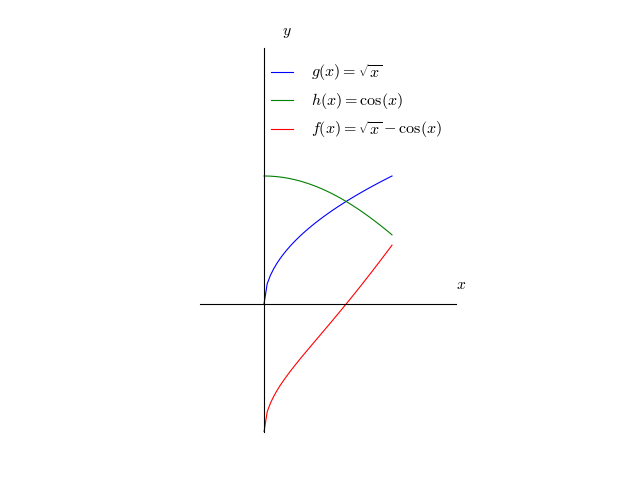

In [6]:
xmin, xmax, ymin, ymax = 0, 1, 0, 1
fig = plt.figure()
ax = plt.axes()
fig.patch.set_facecolor('#ffffff')
ax.plot(x,y1, label="$g(x) = \sqrt{x}$")
ax.plot(x,y2, label="$h(x) = \cos(x)$")
ax.plot(x,y3, label="$f(x) = \sqrt{x} - \cos(x)$")
ax.set(xlim=(xmin-0.5, xmax+0.5), ylim=(ymin-1, ymax+1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('$x$', size=14, labelpad=-24, x=1.02)
ax.set_ylabel('$y$', size=14, labelpad=-21, y=1.02, rotation=0)
#x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
#y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
#ax.set_xticks(x_ticks[x_ticks != 0])
#ax.set_yticks(y_ticks[y_ticks != 0])
ax.set_xticks([])
ax.set_yticks([])
ax.legend(loc='upper right', frameon=False)

In [10]:
a = 0
b = 1
TOL = 0.001
N = 4
print(" Mostrando as iterações")
p, it, h = seq.bisection(f_exer4_1_1, a, b, TOL, N, 0)
print("------------------------------------")
print("it={:d} \t p_n={:.9f} \t f(p_n)={:.9f}".format(it, p, f_exer4_1_1(p)))

 Mostrando as iterações
n 	 a_n 		 b_n 		 P_n 		 f(p_n)
1 	 0.000000000 	 1.000000000 	 0.500000000 	 -0.170475781
2 	 0.500000000 	 1.000000000 	 0.750000000 	 0.134336535
3 	 0.500000000 	 0.750000000 	 0.625000000 	 -0.020393704
------------------------------------
it=3 	 p_n=0.625000000 	 f(p_n)-0.020393704


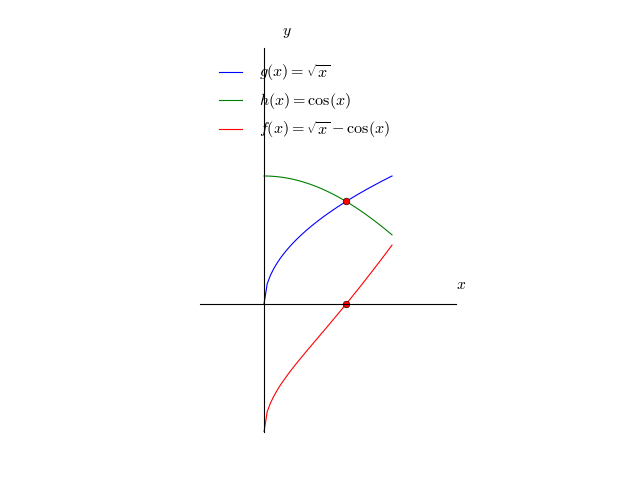

In [8]:
xmin, xmax, ymin, ymax = 0, 1, 0, 1
XSol = np.array([0.641601562, 0.641601562])
YSol = np.array([f_exer4_1_1(0.641601562), g(0.641601562)])
fig = plt.figure()
ax = plt.axes()
fig.patch.set_facecolor('#ffffff')
ax.plot(x,y1, label="$g(x) = \sqrt{x}$")
ax.plot(x,y2, label="$h(x) = \cos(x)$")
ax.plot(x,y3, label="$f(x) = \sqrt{x} - \cos(x)$")
ax.plot(XSol, YSol, 'ro')
ax.set(xlim=(xmin-0.5, xmax+0.5), ylim=(ymin-1, ymax+1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('$x$', size=14, labelpad=-24, x=1.02)
ax.set_ylabel('$y$', size=14, labelpad=-21, y=1.02, rotation=0)
#x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
#y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
#ax.set_xticks(x_ticks[x_ticks != 0])
#ax.set_yticks(y_ticks[y_ticks != 0])
ax.set_xticks([])
ax.set_yticks([])
ax.legend(loc='upper left', frameon=False)